In [1]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from scipy.stats import pearsonr

from utils import *

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

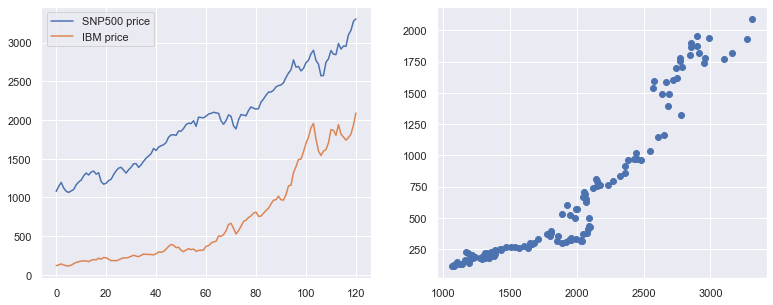

In [2]:
amzn_data = pd.read_csv('../Data/AMZN.csv',parse_dates =['Date'])
snp_data = pd.read_csv('../Data/GSPC.csv',parse_dates=['Date'])

snp_data['Price'] = (snp_data.High + snp_data.Low)*0.5
amzn_data['Price'] = (amzn_data.High + amzn_data.Low)*0.5

fig, ax = plt.subplots(1,2,figsize=(13,5))

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[0])
amzn_data['Price'].plot(label = 'IBM price',ax=ax[0])

X,y = snp_data['Price'].values,amzn_data.Price.values

ax[0].legend()

plt.scatter(snp_data['Price'],amzn_data['Price']);

1) квадратична: $y = b_0 + b_1x + b_2x^2$

Завдання: Побудова множинної регресії

* (A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків
𝑥 = 𝑟𝑚, 𝑦 = 𝑟𝑝
оцініть за допомогою нелінійних регресії параметри $b_0,b_1, b_2$ для компанії.
* (B) Зробіть порівняльну характеристику для всіх моделей;
Модель | $R^2  | r |  F$
* (C) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);
* (D) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього
місяця, та побудуйте довірчий інтервал.

Для оцінки $b_0, b_1,b_2$ використаємо метод найменших квадратів модулю statsmodels

model coefficients: 
	alpha=667.6338, beta=-0.9905, gamma=0.0005
model characteristics: 
	r=0.9706,R^2=0.9421,F=960.1554


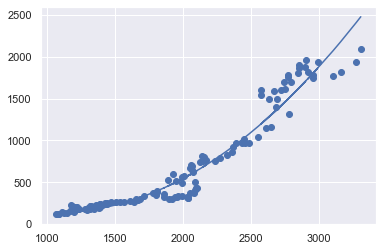

In [3]:
poly_features = PolynomialFeatures(2)
xp = poly_features.fit_transform(X.reshape(-1,1))

model = sm.OLS(y,xp).fit()
y_hat = model.predict(xp)

b0,b1,b2 = model.params

plt.scatter(X,y)
plt.plot(X,y_hat);
print(f'model coefficients: \n\talpha={b0:.4f}, beta={b1:.4f}, gamma={b2:.4f}\nmodel characteristics: \n\tr={model.rsquared**0.5:.4f},R^2={model.rsquared:.4f},F={model.fvalue:.4f}')

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     960.2
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           9.86e-74
Time:                        07:16:03   Log-Likelihood:                -772.57
No. Observations:                 121   AIC:                             1551.
Df Residuals:                     118   BIC:                             1560.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        667.6338    152.894      4.367      0.000     364.862     970.405
x1            -0.9905      0.157     -6.305      0.000      -1.302      -0.679
x2             0.0005   3.78e-05     12.293      0.000       0.000       0.001
==============================================================================
Omnibus:                        7.054   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.653
Skew:                          -0.331   Prob(JB):                       0.0132
Kurtosis:                       4.130   Cond. No.                     5.76e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction conf intervals

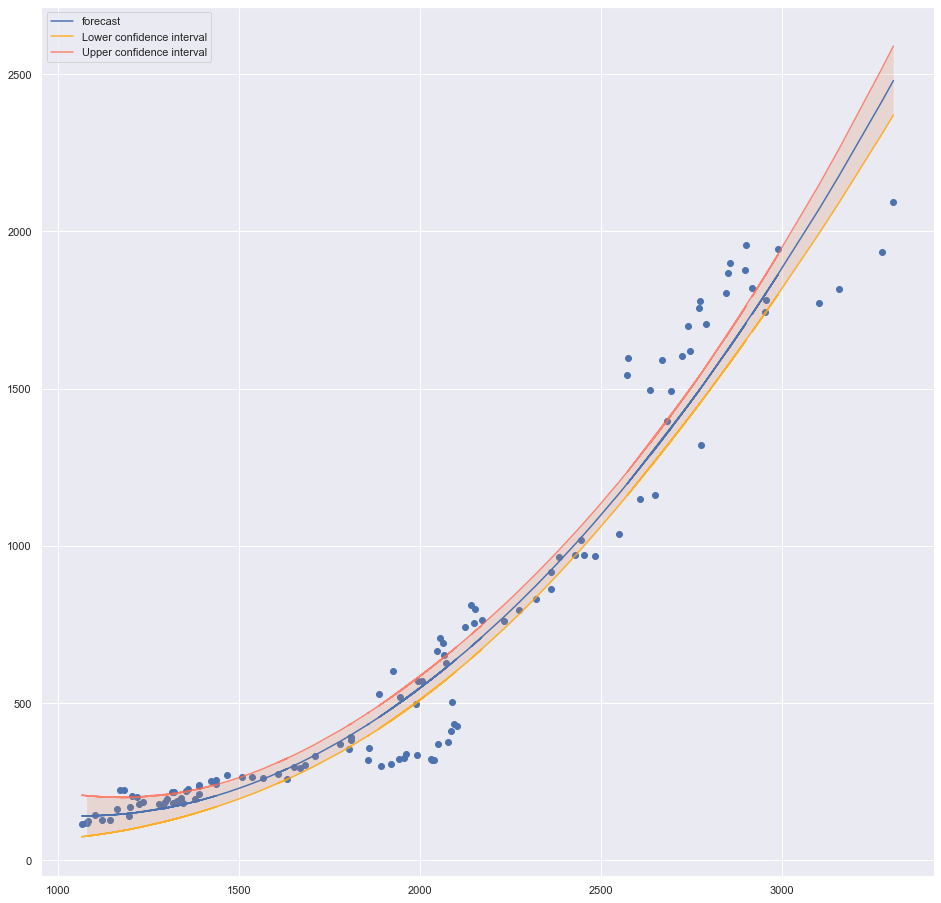

In [5]:
ci_lower, ci_upper = summary_table(model, alpha = 0.05)[1][:, 4:6].T
plt.figure(figsize=(16,16))

plt.plot(X,y_hat,label='forecast')
plt.scatter(X,y)

plt.plot(X, ci_lower,alpha=0.8,color='orange',label='Lower confidence interval')
plt.plot(X, ci_upper,alpha=0.75,c='tomato',label='Upper confidence interval')
plt.fill_between(X,ci_lower,ci_upper,alpha=0.2)
plt.legend();

### Forecast confidence intervals

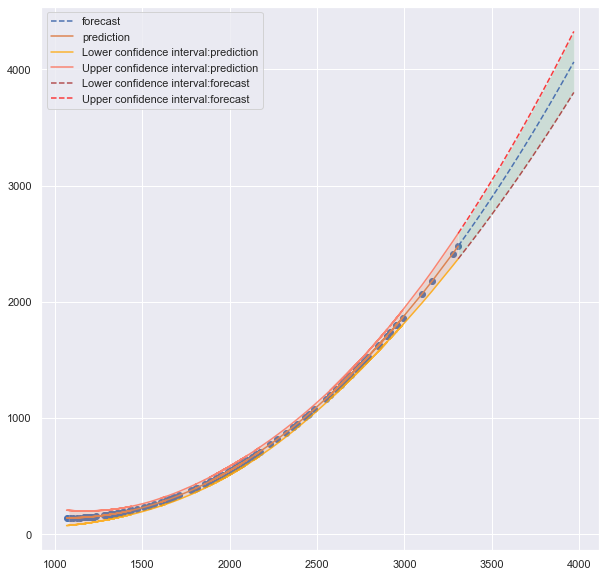

In [6]:
x_forecast = np.linspace(X[-1],1.2*X[-1],num=12)
xp_f = poly_features.fit_transform(x_forecast.reshape(-1,1))
y_hat_forecast = model.predict(xp_f)
p = model.get_prediction(xp_f).conf_int()
l_f,u_f=p.T

plt.figure(figsize=(10,10))
plt.plot(x_forecast,y_hat_forecast,'--',label='forecast')
plt.plot(X,y_hat,label='prediction')
plt.scatter(X,y_hat)

plt.plot(X, ci_lower,alpha=0.8,color='orange',label='Lower confidence interval:prediction')
plt.plot(X, ci_upper,alpha=0.75,c='tomato',label='Upper confidence interval:prediction')

plt.fill_between(X,ci_lower,ci_upper,alpha=0.2)
plt.plot(x_forecast, l_f,'--',alpha=0.8,color='brown',label='Lower confidence interval:forecast')
plt.plot(x_forecast, u_f,'--',alpha=0.75,c='red',label='Upper confidence interval:forecast')

plt.fill_between(x_forecast,l_f,u_f,alpha=0.2)
plt.legend();